In [4]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
Path='/content/drive/MyDrive/ML_dataset/Iris.csv'
df = pd.read_csv(Path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:

df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
X = df.iloc[:, :-1].values

In [9]:
import numpy as np
class KMeans:

    def __init__(self, n_clusters=4):
        self.K = n_clusters

    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self

    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

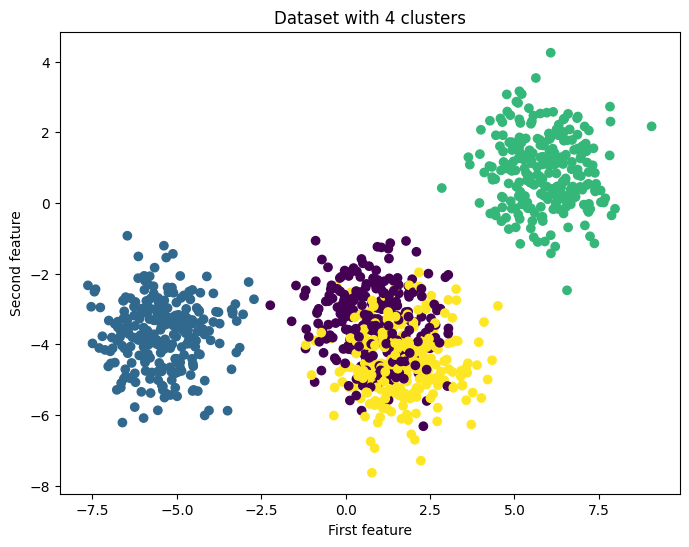

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, n_samples=1000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



In [11]:
kmeans = KMeans(n_clusters=4).fit(X)

In [12]:
row_dict = kmeans.predict(X)

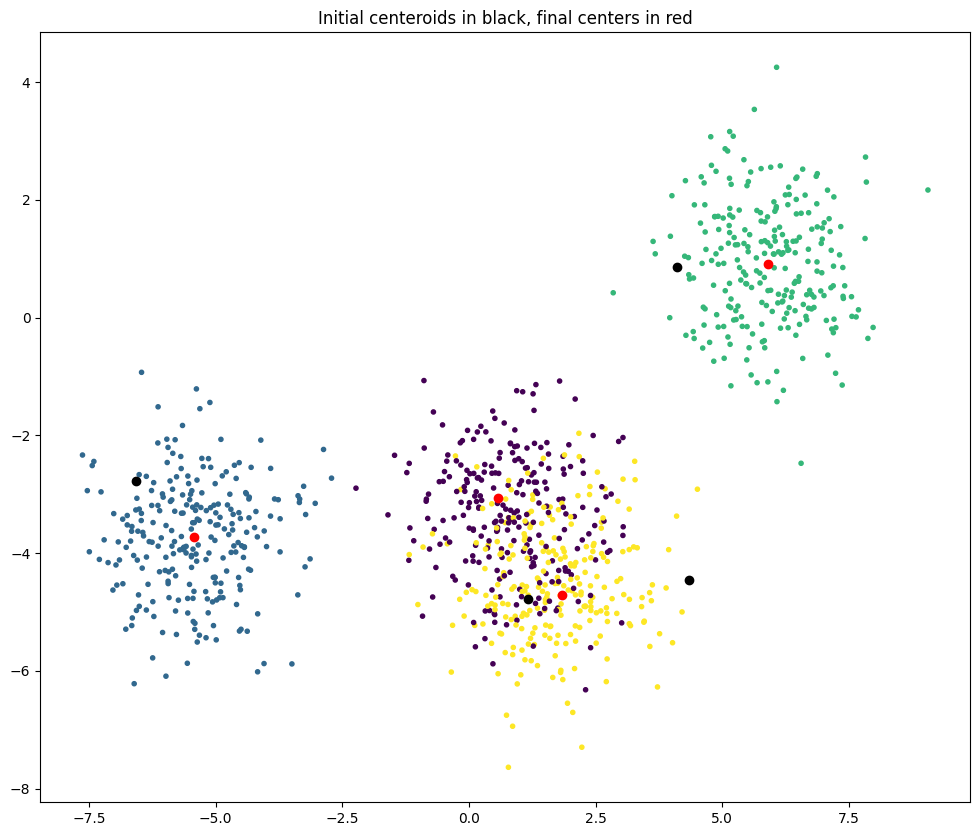

In [13]:
plt.figure(figsize=(12,10))
plt.title("Initial centeroids in black, final centers in red")
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r')
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k')
plt.show()